In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

In [164]:
#Can only try 4,5 or 6 for i

i=6
#files=sorted(glob("/home/abubakr/Desktop/*sync*csv"))
files=sorted(glob("processed_data/*21*/"+str(i)+"*/*sync*csv"))
files

['processed_data/Nov_21/6/dataset6_2023_12_13_11_06_57_sync.csv',
 'processed_data/Nov_21/6/dataset6_2023_12_13_11_06_57_sync_imu.csv']

In [165]:
df1=pd.read_csv(files[0])
df2=pd.read_csv(files[1])

In [166]:
df1.head()

,Timestamp,Pose_X,Pose_Y,Pose_Z,Sonar_Distance_1,Sonar_Distance_2,Sonar_Distance_3,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1790187120,-4.509270e-11,0.000511,4.142528e-12,0.0,0.685777,2.0,0.013933,-0.007062,0.002386
1,2516232490,1.632091e-06,0.000918,-8.124561e-07,0.0,0.683220,2.0,-0.007467,-0.008953,0.000452
2,3273574352,1.222334e-11,0.002727,-1.307119e-11,0.0,0.683561,2.0,-0.011213,-0.009650,0.005047
3,4058265924,-1.346976e-04,0.002303,4.693525e-05,0.0,0.684584,2.0,-0.009765,-0.009166,0.005665
4,4858520030,-9.489537e-12,-0.000341,-2.553987e-11,0.0,0.686629,2.0,-0.010126,-0.006337,0.009447


In [167]:
df2.head()

,Timestamp,IMU_Raw_x,IMU_Raw_y,IMU_Raw_z,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1042764663,-0.340670,-9.710685,-0.464109,-0.008077,-0.006770,0.006650
1,1047842741,-0.335620,-9.716748,-0.472100,-0.012511,-0.009790,0.009546
2,1120615482,-0.311138,-9.706606,-0.479791,-0.017077,-0.005263,0.002805
3,1125930309,-0.310233,-9.703584,-0.476235,-0.013011,-0.005264,-0.000324
4,1137152910,-0.320741,-9.699877,-0.471516,-0.009446,-0.004932,-0.002387


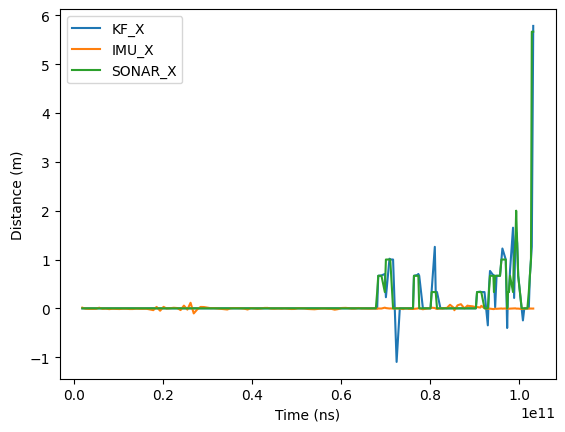

In [168]:
plt.plot(df1["Timestamp"],df1["Pose_X"]*-1)
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_X"])
plt.plot(df1["Timestamp"],df1["Sonar_Distance_1"])
plt.legend(["KF_X","IMU_X","SONAR_X"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_kf.png")

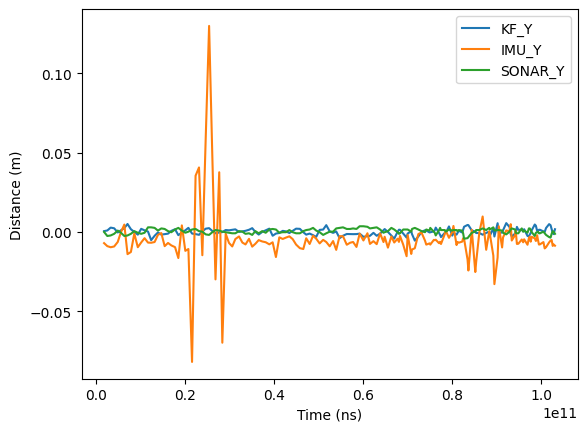

In [169]:
plt.plot(df1["Timestamp"],df1["Pose_Y"])
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_Y"])
plt.plot(df1["Timestamp"],df1["Sonar_Distance_2"]-df1["Sonar_Distance_2"][0])
plt.legend(["KF_Y","IMU_Y","SONAR_Y"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_kf.png")

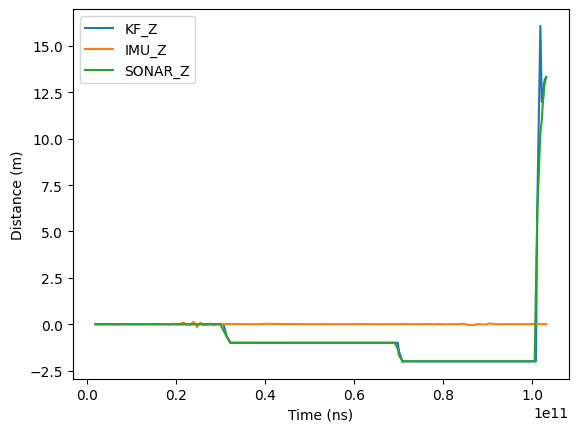

In [170]:
plt.plot(df1["Timestamp"],df1["Pose_Z"]*-1)
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_Z"])
plt.plot(df1["Timestamp"],df1["Sonar_Distance_3"]-df1["Sonar_Distance_3"][0])
plt.legend(["KF_Z","IMU_Z","SONAR_Z"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_kf.png")

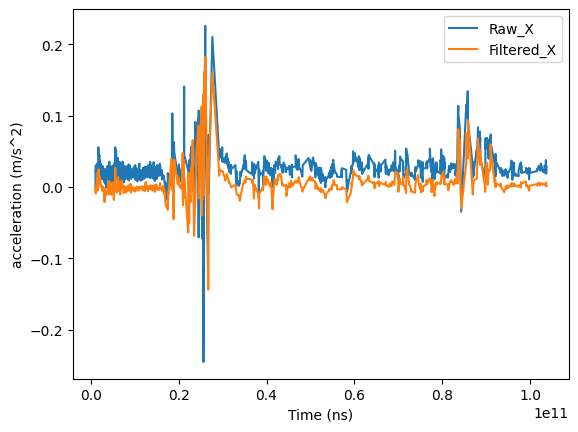

In [171]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_x"]-df2["IMU_Raw_x"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_X"]-df2["IMU_Linear_Acc_X"][0])*1)
plt.legend(["Raw_X","Filtered_X"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_bw.png")

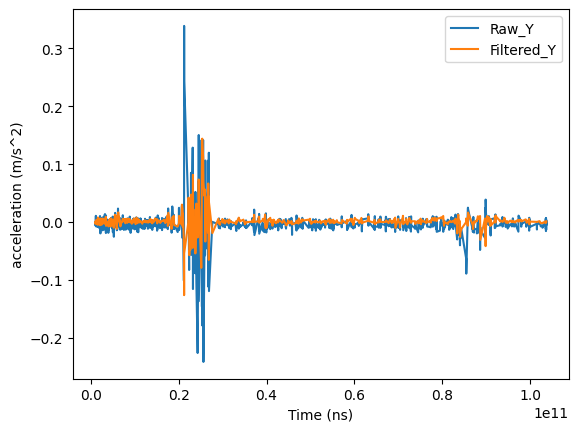

In [172]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_y"]-df2["IMU_Raw_y"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Y"]-df2["IMU_Linear_Acc_Y"][0])*1)
plt.legend(["Raw_Y","Filtered_Y"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_bw.png")

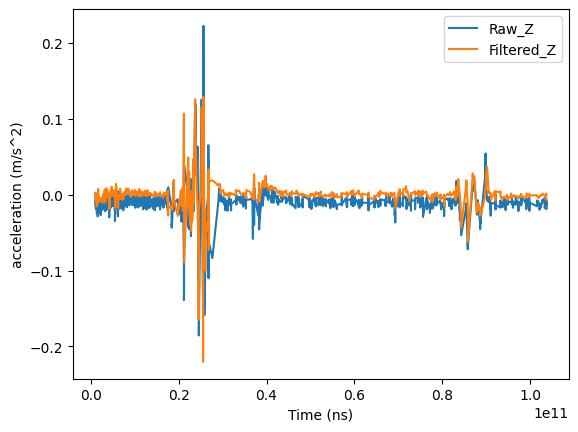

In [173]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_z"]-df2["IMU_Raw_z"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Z"]-df2["IMU_Linear_Acc_Z"][0])*1)
plt.legend(["Raw_Z","Filtered_Z"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_bw.png")

# Other code

In [159]:
df3=pd.read_csv("/home/abubakr/Desktop/imu.csv")
df4=pd.read_csv("/home/abubakr/Desktop/imu2.csv")

In [92]:
df3.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.orientation.x,field.orientation.y,field.orientation.z,field.orientation.w,field.orientation_covariance0,field.orientation_covariance1,...,field.linear_acceleration.z,field.linear_acceleration_covariance0,field.linear_acceleration_covariance1,field.linear_acceleration_covariance2,field.linear_acceleration_covariance3,field.linear_acceleration_covariance4,field.linear_acceleration_covariance5,field.linear_acceleration_covariance6,field.linear_acceleration_covariance7,field.linear_acceleration_covariance8
0,1702464251867193783,62,1145229339,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1702464251870371765,63,1149715423,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.471815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1702464251873468098,64,1167288780,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.479011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1702464251875591263,65,1174196481,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.467270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1702464251877241763,66,1189620733,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.469086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df4.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.vector.x,field.vector.y,field.vector.z
0,1702464251867193783,0,1145229339,NaN,-0.002749,0.011357,0.007850
1,1702464251870371765,0,1149715423,NaN,-0.002404,0.011406,0.007854
2,1702464251873468098,0,1167288780,NaN,-0.002086,0.011324,0.008056
3,1702464251875591263,0,1174196481,NaN,-0.001812,0.011153,0.008423
4,1702464251877241763,0,1189620733,NaN,-0.001596,0.010961,0.008897


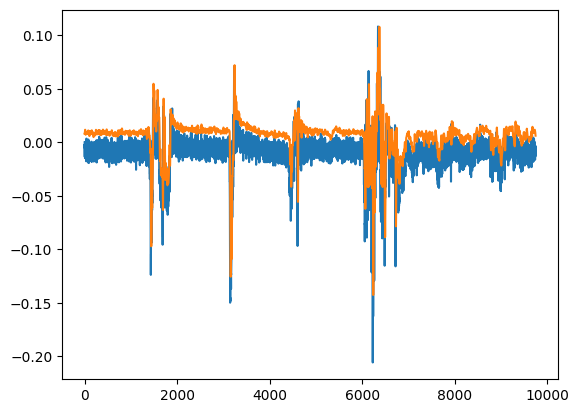

In [94]:
plt.plot(df3["field.linear_acceleration.z"]-df3["field.linear_acceleration.z"][0])
plt.plot(df4["field.vector.z"])

In [95]:
len(df3)

9745

In [96]:
len(df4)

9745

In [97]:
len(df2)

1295